In [1]:
import spacy

ModuleNotFoundError: No module named 'spacy'

In [5]:
!pip install --upgrade pip

    100% |████████████████████████████████| 1.5MB 2.5MB/s ta 0:00:011
  Found existing installation: pip 18.1
    Uninstalling pip-18.1:
      Successfully uninstalled pip-18.1


In [6]:
!pip install spacy

     |████████████████████████████████| 10.4 MB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 9.8 MB 4.1 MB/s eta 0:00:01     |█████████████████████████████   | 8.9 MB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 14.5 MB 336 kB/s eta 0:00:01    |███████▉                        | 3.5 MB 4.3 MB/s eta 0:00:03
     |████████████████████████████████| 126 kB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 184 kB 6.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 68 kB 2.2 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.13.3
    Uninstalling numpy-1.13.3:
      Successfully uninstalled numpy-1.13.3


In [2]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 782.7 MB 1.8 MB/s eta 0:00:011  |▏                               | 5.1 MB 1.6 MB/s eta 0:08:21     |▏                               | 5.3 MB 2.4 MB/s eta 0:05:29     |▌                               | 12.7 MB 1.1 MB/s eta 0:11:44     |▌                               | 12.8 MB 1.1 MB/s eta 0:11:44     |█▋                              | 38.4 MB 2.3 MB/s eta 0:05:19     |█▊                              | 41.7 MB 1.5 MB/s eta 0:07:59     |█▊                              | 42.0 MB 549 kB/s eta 0:22:28     |██▎                             | 55.7 MB 1.3 MB/s eta 0:09:25     |██▎                             | 56.3 MB 2.0 MB/s eta 0:05:59     |██▍                             | 57.5 MB 2.0 MB/s eta 0:05:58     |██▍                             | 58.0 MB 2.0 MB/s eta 0:05:58     |███▍                            | 84.0 MB 2.5 MB/s eta 0:04:43     |████▏                           | 101.7 MB 2.0 MB/s eta 0:05:39     |████▏                           | 102.2 MB 2

In [40]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [5]:
len(nlp("service").vector)

96

In [54]:
import pandas as pd
bdf = pd.read_csv("../../02. Madison Subset/MadisonRestaurants.csv")
rdf = pd.read_csv("../../02. Madison Subset/Madison_Reviews.csv")
mdf = bdf.merge(rdf, on="business_id")

In [60]:
set(mdf.name)

{'107 State',
 '4&20 Bakery & Cafe',
 '43 North',
 '608 Restaurant and Bar',
 '8 Seasons Grille',
 'A Sakura',
 'A-OK Coffee',
 'A8 China',
 'AJ Bombers',
 'Adamah Neighborhood Table',
 'Africana Restaurant and Lounge',
 'Akari Sushi',
 'Alchemy',
 "Aldo's Cafe",
 'Ale Asylum',
 'Alimentari',
 "Alt' N Bach's Town Tap",
 'America Latina',
 "Amy's Cafe",
 'Ancora Coffee',
 'Ancora Coffee Roasters',
 'Angelic Brewing Co',
 'Angkor Wat',
 'Antojitos el Toril',
 "Applebee's Grill + Bar",
 'Arbat',
 "Arby's",
 'Argus Bar & Grill',
 'Asahi Japanese Restaurant',
 'Asia Express',
 'Asian House',
 'Asian Noodle',
 'Asian One',
 'Asian Sweet Bakery',
 'Athens Gyros',
 'Atlanta Bread Company',
 "Auntie Anne's",
 'Avenue Bar',
 'Avenue Club and the Bubble Up Bar',
 "BD's Mongolian Grill",
 "Bab's French Quarter Kitchen",
 'Babcock Hall Dairy Store',
 'Babes Grill & Bar',
 'Badger Bakery And Cafe',
 'Badger Bowl',
 'Badger Tavern',
 'Badgerland Bar & Grill',
 'Bagels Forever',
 'Bahn Thai Restaurant

In [79]:
test_review = rdf.loc[10]

In [45]:
test_review_text = test_review["text"]

In [46]:
test_review_text

"Some nights I just need a Black Cow after work. Black Cow: 1/2 Guinness/ 1/2 New Glarus Spotted Cow. It's fantastic! Now if I have the munchies I order the Corned Beef Shalaylee... These things are Heaven on Earth. I haven't tried anything else here, but I hear it's very good. \n\nThe decor inside is neat and blows Claddagh in Middleton out of the water. \n\nGO HERE\n\nGet a Black Cow\n\nEast Shalaylee's\n\nBe Happy"

In [47]:
from sklearn.metrics.pairwise import cosine_similarity as cosim

In [48]:
service_vec = nlp("service").vector
food_vec = nlp("food").vector

In [49]:
test_review_vec = nlp(test_review_text).vector

In [50]:
print(f"Relatedness to service: {cosim(service_vec.reshape(1, -1), test_review_vec.reshape(1, -1))}")
print(f"Relatedness to food: {cosim(food_vec.reshape(1, -1), test_review_vec.reshape(1, -1))}")

Relatedness to service: [[0.3225682]]
Relatedness to food: [[0.3258762]]


In [78]:
def assignCategory(input_text):
    #from sklearn.metrics.pairwise import cosine_similarity as cosim
    #import spacy

    #nlp = spacy.load('en_core_web_sm')
    
    service_vec = nlp("service").vector
    food_vec = nlp("food").vector
    imput_text_vec = nlp(input_text).vector
    serivce_sim_score = cosim(service_vec.reshape(1, -1), imput_text_vec.reshape(1, -1))
    food_sim_score = cosim(food_vec.reshape(1, -1), imput_text_vec.reshape(1, -1))
    if food_sim_score > serivce_sim_score:
        return "food"
    else:
        return "service"

In [71]:
assignCategory(test_review_text)

'food'

In [51]:
import nltk

In [52]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...


In [53]:
sid.polarity_scores(test_review_text)

{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'compound': 0.9589}

In [258]:
def score(input_text):
    sentiment_dict = sid.polarity_scores(input_text)
    return sentiment_dict["pos"]

In [153]:
sample_set = mdf.sample(10**4, random_state = 777)

In [74]:
!pip install tqdm

In [76]:
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()

In [155]:
%time
sample_set['category'] = sample_set["text"].apply(lambda x: assignCategory(x))

CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 23.4 µs


In [259]:
sample_set['score'] = sample_set["text"].apply(lambda x: score(x))

In [284]:
sample_set.to_csv("../../03. Data Cleaning Code/sample_set.csv")

In [260]:
sample_food = sample_set[sample_set["category"] == "food"]
sample_service = sample_set[sample_set["category"] == "service"]

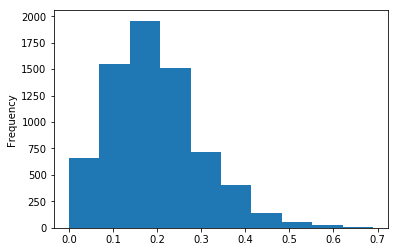

In [261]:
sample_food.score.plot.hist()

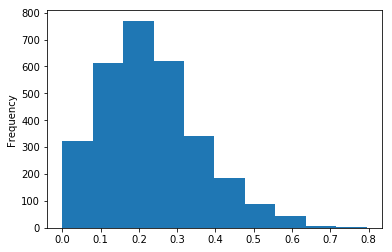

In [262]:
sample_service.score.plot.hist()

In [168]:
from scipy import stats

In [268]:
def grade(review_text):
    x_food = score(review_text)
    cat = assignCategory(review_text)
    if cat == "food":
        percentile_val = stats.percentileofscore(sample_food.score, float(x_food))
    else:
        percentile_val = stats.percentileofscore(sample_service.score, float(x_food))
    if percentile_val < 20:
        return "F"
    elif percentile_val < 40:
        return "D"
    elif percentile_val < 60:
        return "C"
    elif percentile_val < 80:
        return "B"
    else:
        return "A"

In [270]:
test_text = mdf.loc[1000]["text"]
print(test_text)
print(sid.polarity_scores(test_text))
print(score(test_text))
print(stats.percentileofscore(sample_food.score, .96))
print(assignCategory(test_text))
print(grade(test_text))

Excellent food.   It's a little loud but if you're in one in the side rooms, it's fine.  Seated immediately even when we were early for our reservation.  Good drinks, decent pour.  Had the Rueben.   Excellent tender corn beef.
{'neg': 0.0, 'neu': 0.71, 'pos': 0.29, 'compound': 0.9253}
0.29
100.0
food
A


In [271]:
test_text = mdf.loc[1500]["text"]
print(test_text)
print(sid.polarity_scores(test_text))
print(score(test_text))
print(stats.percentileofscore(sample_food.score, .96))
print(assignCategory(test_text))
print(grade(test_text))

I understand inflation is real, the owners have tax cases and things cost money but I walked away flabbergasted that there's no way anyone can justify this place costing the same as Texas de Brazil or Fogo de Chao. 

I was confused as I never recall paying $45/pp. 
I've returned a few times each time I'm in town and will HIGHLY RECOMMEND Sunday brunch. 

I will say it's nice to have such a place in town versus driving to Chicago even Milwaukee. Nonetheless, I saw if you're redeeming a GroupOn they'll access a 20% tip and I get that and support it to ensure the staff is properly compensated. 

So, 5 stars for keeping the pineapple on the grill. 
2 stars for not working harder to keep the fruit flies away as I swatted too many last night. 
5 stars for the place and free parking. Although, there was a street event 8/9/19 and I had to pay for parking. 
2 stars for the service. I thought the place closed at 10p. I got on Yelp and see it does close at 10p yet they  started shutting down at 9

In [273]:
test_text = mdf.loc[5000]["text"]
print(test_text)
print(assignCategory(test_text))
print(grade(test_text))

My worst experience ever, lost my order on the night of Shake the Lake, it took 45 minutes to get four ice cream dishes!
service
F


In [274]:
test_text = mdf.loc[1000]["text"]
print(test_text)
print(assignCategory(test_text))
print(grade(test_text))

Excellent food.   It's a little loud but if you're in one in the side rooms, it's fine.  Seated immediately even when we were early for our reservation.  Good drinks, decent pour.  Had the Rueben.   Excellent tender corn beef.
food
A


In [272]:
test_text = mdf.loc[1500]["text"]
print(test_text)
print(grade(test_text))

I understand inflation is real, the owners have tax cases and things cost money but I walked away flabbergasted that there's no way anyone can justify this place costing the same as Texas de Brazil or Fogo de Chao. 

I was confused as I never recall paying $45/pp. 
I've returned a few times each time I'm in town and will HIGHLY RECOMMEND Sunday brunch. 

I will say it's nice to have such a place in town versus driving to Chicago even Milwaukee. Nonetheless, I saw if you're redeeming a GroupOn they'll access a 20% tip and I get that and support it to ensure the staff is properly compensated. 

So, 5 stars for keeping the pineapple on the grill. 
2 stars for not working harder to keep the fruit flies away as I swatted too many last night. 
5 stars for the place and free parking. Although, there was a street event 8/9/19 and I had to pay for parking. 
2 stars for the service. I thought the place closed at 10p. I got on Yelp and see it does close at 10p yet they  started shutting down at 9

In [282]:
test_text = "I hate the service here. The people here are probably racist. The food was delicious though."
print(test_text)
print(assignCategory(test_text))
print(grade(test_text))

I hate the service here. The people here are probably racist. The food was delicious though.
service
D


In [285]:
mdf.to_csv("../../03. Data Cleaning Code/merged.csv")

In [ ]:
def sampleSetRegen():
    sample = mdf.sample(10**4, random_state = 777)
    sample['category'] = sample["text"].apply(lambda x: assignCategory(x))
    sample['score'] = sample["text"].apply(lambda x: score(x))
    
def assignCategory(input_text):
    "Assigns provided text to a category."
    #TODO should change this to a better model at some point
    nlp = spacy.load('en_core_web_sm')
    max_cosim_index, max_cosim = -1, -1

    input_text_vector = nlp(input_text).vector
    for i, cat in enumerate(CATEGORIES):
        curr_cosim_val = cosim(input_text_vector.reshape(1, -1),
                                nlp(cat).vector.reshape(1, -1))
        if max_cosim < curr_cosim_val:
            max_cosim = curr_cosim_val
            max_cosim_index = i

    return CATEGORIES[max_cosim_index]

def score(input_text):
    sid = SentimentIntensityAnalyzer()
    sentiment_dict = sid.polarity_scores(input_text)
    return sentiment_dict["pos"]

def grade(review_text):
    cat = assignCategory(review_text)
    x_food = score(review_text)
    sample_cat = sample_set[sample_set["category"] == cat]
    percentile_val = stats.percentileofscore(sample_cat.score, float(x_food))
    if percentile_val < 20:
        return "F"
    elif percentile_val < 40:
        return "D"
    elif percentile_val < 60:
        return "C"
    elif percentile_val < 80:
        return "B"
    else:
        return "A"